In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Preprocessing:

In [15]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# Perform exploratory data analysis (EDA) to understand patterns and missing values.

print("\nDataset info:")
df.info()

print("\nMissing values in each column:")
df.isnull().sum()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values in each column:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# Drop columns with too many missing values or **not useful for prediction**
df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], inplace=True)

# Handle missing values appropriately (e.g., imputation, removal).
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

print("\nChecking Missing values:")
df.isnull().sum()


Checking Missing values:


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64

In [18]:
# Convert categorical variables into numerical format (e.g., one-hot encoding, label encoding).

    # Convert categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [19]:
# Normalize/standardize numerical features if necessary.

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']
X = df[features]
y = df['survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output shapes
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (712, 8)
Testing set size: (179, 8)


### Model Implementation:

In [21]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict outcomes on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.8100558659217877

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Model Evaluation:

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888


##### Interpretation:

+ Accuracy (81%): Overall, the model correctly predicts 81% of survival outcomes.
+ Precision (79%): When the model predicts a passenger survived, it's correct 79% of the time.
+ Recall (74%): The model identifies 74% of actual survivors.
+ F1-score (76%): A balance between precision and recall, useful in imbalanced data.

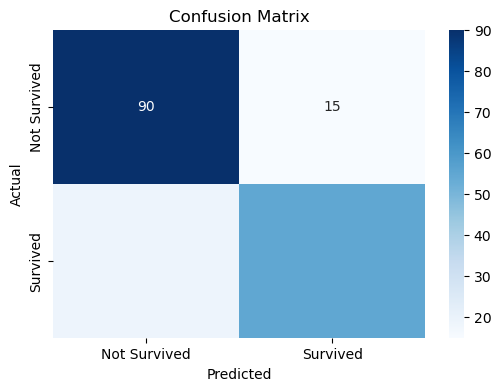

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##### Interpretation:

+ True Negatives (90): Correctly predicted not survived.
+ True Positives (55): Correctly predicted survived.
+ False Positives (15): Predicted survived but actually didn't.
+ False Negatives (19): Predicted not survived but actually did.

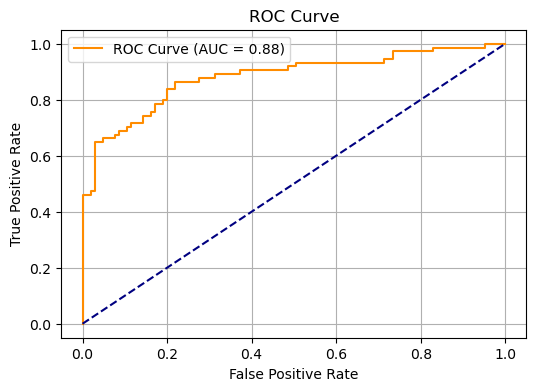

AUC Score: 0.8817245817245817


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc_score)

##### Interpretation:

+ ROC Curve visualizes the trade-off between sensitivity (TPR) and specificity (1 - FPR).
+ AUC Score (~0.87): Strong classification capability (1.0 is perfect, 0.5 is random).

### Results Interpretation & Discussion:

+ Summarize the findings of your model.
  > We used logistic regression to predict whether individuals involved in the Titanic incident would survive based on given features. Our model correctly predicts survival outcomes 81% of the time and accurately identifies passengers who survived 79% of the time.
+ Discuss the importance of different features in prediction.
  > Introducing more features can make the model more complex, potentially reducing biases by capturing intricate patterns from multiple interacting features. However, using too few features might lead to overgeneralization, where the model makes broad assumptions that don't accurately reflect the data.
+ Explain the implications of your results in a real-world context.
  > The results suggest that certain factors significantly influence survival chances in the Titanic incident. By analyzing these characteristics, we can better understand the determinants of survival and apply this knowledge to similar real-world scenarios, such as improving safety protocols in maritime travel.
+ Suggest possible improvements (e.g., feature engineering, handling class imbalance, hyperparameter tuning).
  > Further improve the accuracy and precision of the model by optimizing the model's hyperparameters using methods like grid search or random search to improve accuracy and robustness.